# NLP Emails

# Business Objective:

- Inappropriate emails would demotivates 
and spoil the positive environment that would lead to more attrition rate and low productivity and Inappropriate emails could be on form of bullying,racism,sexual favoritism and hate in the gender or culture,in today's world so dominated by email no organization is immune to these hate emails.
# The goal of the project is to identify such emails in the given day based on the above inappropriate content


# Import Library

In [1]:
#Basic Libraries

import pandas as pd 
import numpy as np
import re
import numpy
import warnings
warnings.filterwarnings('ignore')
# For NLP & Preprocessing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS #Better stopwords here
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
#Visualizations

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


# Uploading CSV File

In [2]:
em=pd.read_csv(r"C:\Users\DELL\Desktop\project\New folder\emails1 (1).csv")
em

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


# Data Cleaning

# .drop

In [3]:
em.drop('Unnamed: 0',axis=1,inplace=True)
em

,filename,Message-ID,content,Class
0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...
48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


# .head() and .tail()

head is used show to the By Default=5 rows in the dataset

In [4]:
em.head()
print(em.head())

                   filename                                     Message-ID  \
0   arnold-j/_sent_mail/34.  <15267340.1075857594923.JavaMail.evans@thyme>   
1  arnold-j/_sent_mail/517.  <15539583.1075857652152.JavaMail.evans@thyme>   
2  arnold-j/_sent_mail/743.   <4339799.1075857657711.JavaMail.evans@thyme>   
3  arnold-j/_sent_mail/766.  <25574783.1075857658215.JavaMail.evans@thyme>   
4  arnold-j/_sent_mail/797.  <19506151.1075857658895.JavaMail.evans@thyme>   

                                             content    Class  
0  eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...  Abusive  
1                                           fuck you  Abusive  
2  Gentlemen:\nThe following champagne is availab...  Abusive  
3  sorry i've taken so long...just been trying to...  Abusive  
4  asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...  Abusive  


In [5]:
em.tail()
print(em.tail())

                          filename  \
48071  campbell-l/notes_inbox/133.   
48072  campbell-l/notes_inbox/134.   
48073  campbell-l/notes_inbox/135.   
48074  campbell-l/notes_inbox/136.   
48075  campbell-l/notes_inbox/137.   

                                          Message-ID  \
48071   <6503484.1075857876489.JavaMail.evans@thyme>   
48072  <17277180.1075857876513.JavaMail.evans@thyme>   
48073  <31066400.1075857876537.JavaMail.evans@thyme>   
48074  <26024436.1075857876659.JavaMail.evans@thyme>   
48075  <10677824.1075857876692.JavaMail.evans@thyme>   

                                                 content        Class  
48071  Dear Market Participants,\n\nPlease note the c...  Non Abusive  
48072  According to my fancy ciphering we made $310,0...  Non Abusive  
48073  BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...  Non Abusive  
48074  Welcome to: DIAMONDS NEWSLETTER         Issue:...  Non Abusive  
48075  ---------------------- Forwarded by Tamara Jae...  Non Abusive  


tail is used show rows by Descending order

# .shape

It show the total no of Rows & Column in th dataset.

In [6]:
em.shape

(48076, 4)

#There are 48k records and 4 columns

In [7]:
em.columns

Index(['filename', 'Message-ID', 'content', 'Class'], dtype='object')

# Exploratory Data Analysis(EDA)

# Basic information - .info()

In [8]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    48076 non-null  object
 1   Message-ID  48076 non-null  object
 2   content     48076 non-null  object
 3   Class       48076 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


No null values are visible

# Describe the data -.describe()

In [9]:
em.describe()

,filename,Message-ID,content,Class
count,48076,48076,48076,48076
unique,48076,48076,24656,2
top,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,Ken Lay and Jeff Skilling were interviewed on ...,Non Abusive
freq,1,1,19,44666


Notice that there are atually 24k values only for content whereas the rest are duplicated

# Removing Unwanted features

After examining filename and Message-ID, we came to the conclusion that these two columns are not useful in our Modelling. We will drop those columns.

In [10]:
em.drop(['filename', 'Message-ID'],axis=1,inplace=True)
em

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


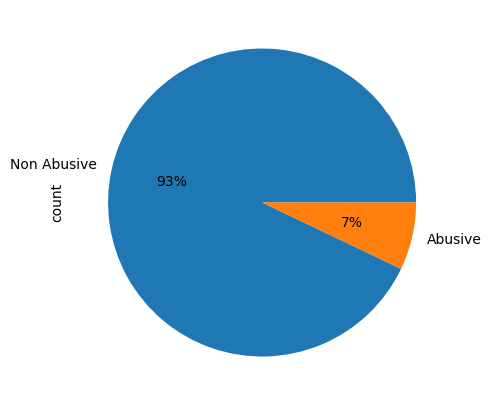

In [11]:
em['Class'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))
plt.show()

# Duplicate value check

In [12]:
abusive=em[em['Class']=='Abusive']
abusive

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
3405,There is a lot of confused bullshit floating a...,Abusive
3406,"wow, three weeks away from the kids ! brave an...",Abusive
3407,\ngot this from late friday. have you ever hea...,Abusive
3408,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive


In [13]:
non_abusive=em[em['Class']=='Non Abusive']
non_abusive

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [14]:
non_abusive[non_abusive.duplicated()]

,content,Class
4014,---------------------- Forwarded by Phillip K ...,Non Abusive
4015,---------------------- Forwarded by Phillip K ...,Non Abusive
4016,"Dave, \n\n Here are the names of the west desk...",Non Abusive
4017,"Paula,\n\n 35 million is fine\n\nPhillip",Non Abusive
4018,---------------------- Forwarded by Phillip K ...,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [15]:
non_abusive=non_abusive.drop_duplicates()
non_abusive


,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [16]:
em=pd.concat([abusive,non_abusive]).reset_index(drop=True)
em

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
26419,Do you need new leads for your business ?\n D...,Non Abusive
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
26421,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
26422,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


# Null value check

In [17]:
em.isna().sum()

content    0
Class      0
dtype: int64

# .dtypes

In [18]:
em.dtypes

content    object
Class      object
dtype: object

In [19]:
em.Class.value_counts()

Class
Non Abusive    23014
Abusive         3410
Name: count, dtype: int64

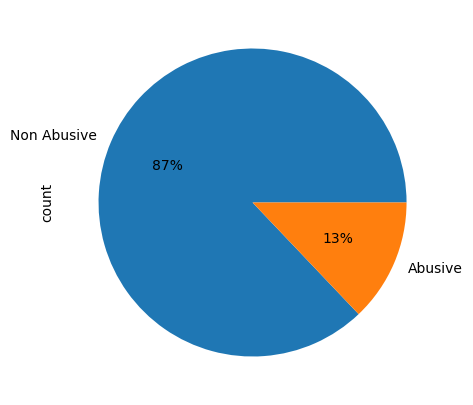

In [20]:
em['Class'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))
plt.show()

# Feature Analysis

In [21]:
em['Class'].value_counts()

Class
Non Abusive    23014
Abusive         3410
Name: count, dtype: int64

In [22]:
#Percentage counts
em.Class.value_counts(normalize=True)

Class
Non Abusive    0.870951
Abusive        0.129049
Name: proportion, dtype: float64

In [23]:
#Convert spam to 1 and ham to 0
em['label'] = em['Class'].map({'Non Abusive':0,'Abusive':1})
em

,content,Class,label
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,1
1,fuck you,Abusive,1
2,Gentlemen:\nThe following champagne is availab...,Abusive,1
3,sorry i've taken so long...just been trying to...,Abusive,1
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,1
...,...,...,...
26419,Do you need new leads for your business ?\n D...,Non Abusive,0
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive,0
26421,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive,0
26422,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive,0


In [24]:
#Length
em['length'] = em['content'].apply(len)
em

,content,Class,label,length
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,1,220
1,fuck you,Abusive,1,8
2,Gentlemen:\nThe following champagne is availab...,Abusive,1,612
3,sorry i've taken so long...just been trying to...,Abusive,1,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,1,203
...,...,...,...,...
26419,Do you need new leads for your business ?\n D...,Non Abusive,0,1523
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive,0,1126
26421,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive,0,892
26422,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive,0,932


array([<Axes: title={'center': 'Abusive'}>,
       <Axes: title={'center': 'Non Abusive'}>], dtype=object)

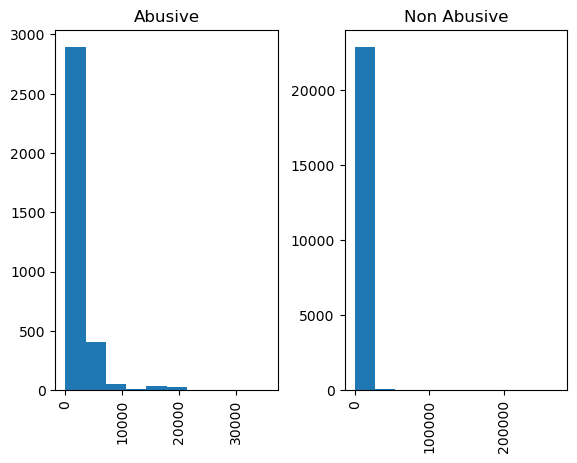

In [25]:
em.hist(column='length',by = 'Class')

In [26]:
text_len=[len(x) for x in em.content]
outlier = [y for y in text_len if y > 1000]
len(outlier)

10714

In [27]:
em.length = em.content.apply(lambda x : len(x))

<Axes: xlabel='length', ylabel='Count'>

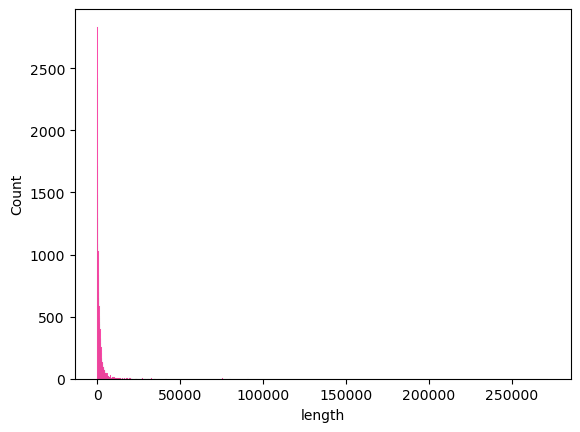

In [28]:
sns.histplot(em.length, color='deeppink')

There are huge outliers which we need to remove. We will remove the outliers after preprocessing

# Data Cleaning

In [20]:
# Lemmatization

In [21]:
df = em.copy()
df.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [22]:
#Before cleaning
df.content.head()

0    eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...
1                                             fuck you
2    Gentlemen:\nThe following champagne is availab...
3    sorry i've taken so long...just been trying to...
4    asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...
Name: content, dtype: object

In [23]:
# Clean The Data using RegEx
import re # regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text=text.lower()
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[0-9' ']+',' ',text)
    text=re.sub('[''""…]', ' ', text)
    text=re.sub('[\n]', ' ', text)
    text=re.sub('[\s]', ' ', text)
    return text
clean = lambda x: clean_text(x)

em['content'] = em.content.apply(clean)
em.content

0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr           a...
                               ...                        
26419     do you need new leads for your business    do...
26420                garth brooks   wrapped up in you  ...
26421          dear smartreminders member             f...
26422                    kid rock   forever         off...
26423     you received this e mail because you register...
Name: content, Length: 26424, dtype: object

In [24]:
#Word frequency
freq = pd.Series(' '.join(em['content']).split()).value_counts()[:20] # for top 20
freq

the       244859
to        180830
and       118908
a         109068
of         99291
in         77875
you        70100
for        69188
excelr     69167
i          68157
com        67959
on         57810
is         56023
s          53946
that       47227
this       44753
ect        41268
from       40770
be         38636
with       36816
Name: count, dtype: int64

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
em['content'] = em['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
em['content']

0        eat shit john j lavorato excelr pm john arnold...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john j lavorato excelr john arnold hou...
                               ...                        
26419    need new leads business need increased interne...
26420    garth brooks wrapped win tickets trip garth br...
26421    dear smartreminders member franchoice free one...
26422    kid rock forever official kid rock site www ki...
26423    received e mail registered e trade web site on...
Name: content, Length: 26424, dtype: object

In [27]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(em['content']).split()).value_counts()[:20] # for top 20
freq_Sw

excelr     69167
com        67959
ect        41268
http       31523
font       28452
td         27087
hou        20826
subject    19455
www        18261
please     17420
e          16668
pm         15467
time       14027
message    13421
would      13405
b          13122
new        13017
sent       12033
one        12020
get        11318
Name: count, dtype: int64

# Advanced Feature Analysis

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [38]:
# import the SentimentIntensityAnalyzer class
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create an instance of the class
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(Content):
    # get the polarity scores for the content
    vs = analyzer.polarity_scores(Content)
    # return the compound score
    return vs['compound']

# apply the vadersentimentanalysis function to the Lemma column of em dataframe
em['Vader Sentiment'] = em['content'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

# apply the vader_analysis function to the Vader Sentiment column of em dataframe
em['Vader Analysis'] = em['Vader Sentiment'].apply(vader_analysis)

# display the first five rows of em dataframe
em.head()


,content,Class,label,length,Vader Sentiment,Vader Analysis
0,eat shit john j lavorato excelr pm john arnold...,Abusive,1,220,-0.5574,Negative
1,fuck,Abusive,1,8,-0.5423,Negative
2,gentlemen following champagne available approx...,Abusive,1,612,0.8555,Positive
3,sorry taken long trying fend chicks life soooo...,Abusive,1,505,-0.2567,Neutral
4,asshole john j lavorato excelr john arnold hou...,Abusive,1,203,-0.4019,Neutral


In [39]:
vader_counts = em['Vader Analysis'].value_counts()
vader_counts

Vader Analysis
Positive    17014
Neutral      7591
Negative     1819
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x166c7e0bb90>,
 [Text(-0.48046789088872927, 0.9895203918186509, 'Positive'),
  Text(0.2569425769028095, -1.0695702464890018, 'Neutral'),
  Text(1.3185530703945976, -0.2896856926963761, 'Negative')],
 [Text(-0.2620733950302159, 0.5397383955374458, '64.4%'),
  Text(0.14015049649244155, -0.5834019526303645, '28.7%'),
  Text(0.8302000813595615, -0.182394695401422, '6.9%')])

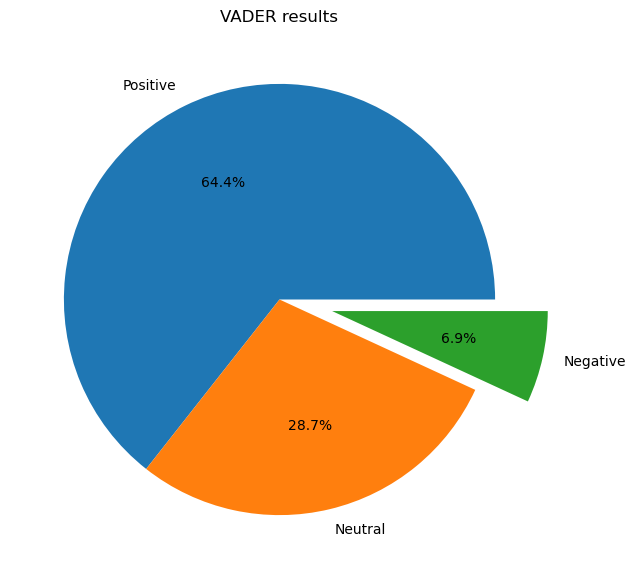

In [40]:
plt.figure(figsize=(15,7))
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

#Abusive and Non Abusive data

In [31]:
Abusive = em[em['Class']=='Abusive']
NAb = em[em['Class']=='Non Abusive']

# Worldcloud function

In [28]:
em

,content,Class
0,eat shit john j lavorato excelr pm john arnold...,Abusive
1,fuck,Abusive
2,gentlemen following champagne available approx...,Abusive
3,sorry taken long trying fend chicks life soooo...,Abusive
4,asshole john j lavorato excelr john arnold hou...,Abusive
...,...,...
26419,need new leads business need increased interne...,Non Abusive
26420,garth brooks wrapped win tickets trip garth br...,Non Abusive
26421,dear smartreminders member franchoice free one...,Non Abusive
26422,kid rock forever official kid rock site www ki...,Non Abusive


In [32]:
def worldcloud(data,title):
    txt = ' '.join(data['content'])
    stop = STOPWORDS
    
    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,size = 50)

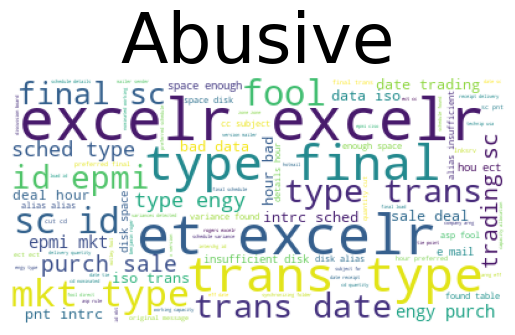

In [33]:
worldcloud(Abusive,'Abusive')

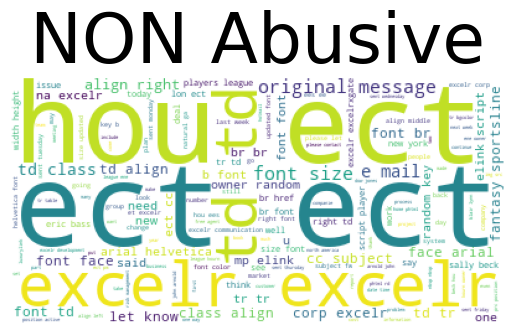

In [34]:
worldcloud(NAb,'NON Abusive')

# Feature Extraction
# 1. count vectoriser (tells the frequency of a word)

In [46]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=1,max_df=5)  # df = data frequency
X=vectorizer.fit_transform(em['content'])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names_out(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [48]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
1,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
2,aaaaaaaaaaaaaaaaaaaaaaaaaaaaafhzwiaaaaaaaadzuq...,1,0.000007
3,aaaaaaaaaaaaaaaaaaaaahzpzxcaaaaaabok,1,0.000007
4,aaaaaaaaaaaawflaiaaaaaaaag,1,0.000007
5,aaaaaabwaad,4,0.000027
6,aaaaaewjvgbqaaaavx,1,0.000007
7,aaaabrtzwfz,1,0.000007
8,aaabbqebaqebaqaaaaaaaaadaaec,1,0.000007
9,aaagbagabbqa,1,0.000007


# 2.TFIDF (Term Frequency Inverse Document Frequency) Vectorizer

In [49]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=500,max_df=1,smooth_idf=True) # keep top 500 words
doc_vec=vectorizer.fit_transform(em['content'])
feature_names=vectorizer.get_feature_names_out()
dense=doc_vec.todense()  # todense returns a matrix
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [50]:
df

,abramoff,acegas,actarray,activitated,advantium,aeb,aefa,afterholiem,aftertax,afudc,...,yfti,yil,yourman,youwintrivia,zeroue,zonealarm,zoomerang,zpro,zubeida,zzzipe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. N-Gram Vectorizer

In [51]:
# Bi-gram

def get_top_n2_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq, key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [52]:
top2_words=get_top_n2_words(em['content'],n=200) # top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-grams','Freq']
top2_df.head(50)

,Bi-grams,Freq
0,hou ect,18691
1,ect ect,18674
2,http www,17005
3,excelr excelr,13404
4,excelr com,9653
5,original message,9590
6,td td,9165
7,font size,8396
8,td class,6112
9,href http,5593


[Text(0, 0, 'hou ect'),
 Text(1, 0, 'ect ect'),
 Text(2, 0, 'http www'),
 Text(3, 0, 'excelr excelr'),
 Text(4, 0, 'excelr com'),
 Text(5, 0, 'original message'),
 Text(6, 0, 'td td'),
 Text(7, 0, 'font size'),
 Text(8, 0, 'td class'),
 Text(9, 0, 'href http'),
 Text(10, 0, 'align right'),
 Text(11, 0, 'cc subject'),
 Text(12, 0, 'et excelr'),
 Text(13, 0, 'sportsline com'),
 Text(14, 0, 'corp excelr'),
 Text(15, 0, 'let know'),
 Text(16, 0, 'font font'),
 Text(17, 0, 'td tr'),
 Text(18, 0, 'font face'),
 Text(19, 0, 'font td')]

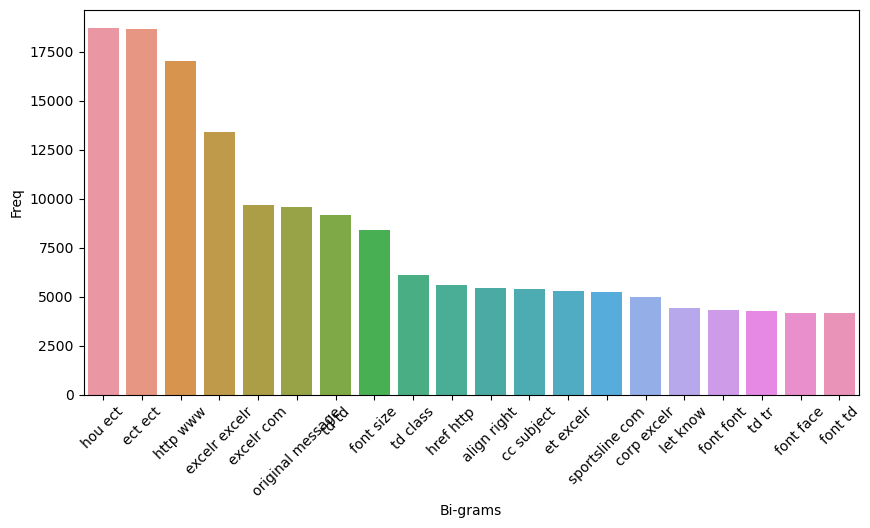

In [53]:
# Bi-gram plot
top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_bigram['Bi-grams'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram['Bi-grams'])

In [54]:
# Tri-gram

def get_top_n3_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq, key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [55]:
top3_words=get_top_n3_words(em['content'],n=200)
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-grams','Freq']
top3_df.head(50)

,Tri-grams,Freq
0,hou ect ect,15885
1,et excelr excelr,4890
2,td td class,4769
3,td class align,3985
4,corp excelr excelr,3851
5,fantasy sportsline com,3773
6,http fantasy sportsline,3770
7,www fool com,3686
8,http www fool,3685
9,sportsline com mp,3651


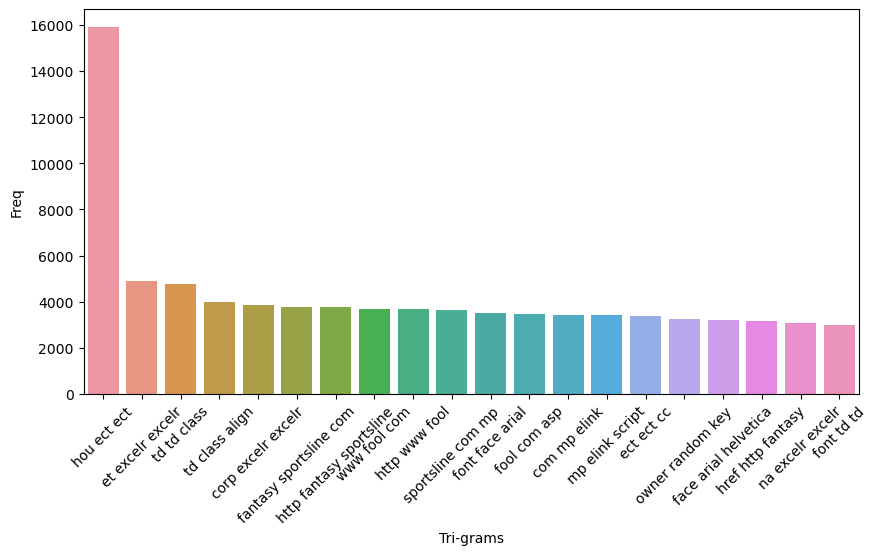

In [56]:
# Tri-gram plot

top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_trigram['Tri-grams'],y=top20_trigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_trigram['Tri-grams'])
plt.show()

# BOW word_count_matrix

In [35]:
def split_into_words(i):
    return (i.split(' '))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Preparing email texts into bow word count matrix format 
email_bow=CountVectorizer(analyzer=split_into_words).fit(em.content)

In [37]:
# For all messages
all_emails_matrix=email_bow.transform(em.content)
all_emails_matrix.shape

(26424, 85997)

# TFIDF tokenizer

In [38]:
# Learning Term weighting and normalizing on entire emails
tfidf_transformer=TfidfTransformer().fit(all_emails_matrix)

In [39]:
# Preparing TFIDF for all emails
all_emails_tfidf=tfidf_transformer.transform(all_emails_matrix)
all_emails_tfidf.shape

(26424, 85997)

# Label Encoding 

In [40]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels

le = preprocessing.LabelEncoder()
  
em['Class']= le.fit_transform(em['Class']) 

em['Class'].value_counts()

Class
1    23014
0     3410
Name: count, dtype: int64

# Model Building

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(all_emails_tfidf,em['Class'],test_size=0.3,random_state=42)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18496, 85997), (7928, 85997), (18496,), (7928,))

# Data Balancing using SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [44]:
oversample = SMOTE(random_state=42)

# transform the dataset
x_train_os,y_train_os=oversample.fit_resample(x_train,y_train)

x_train_os.shape,y_train_os.shape

((32180, 85997), (32180,))

In [45]:
# 2. Undersampling

undersample=RandomUnderSampler(random_state=42)

# transform the dataset
x_train_s,y_train_s=undersample.fit_resample(x_train_os,y_train_os)

x_train_s.shape,y_train_s.shape

((32180, 85997), (32180,))

# 1. Multinomial Naive Bayes Classifier Algorithm

In [69]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mnb=MB()
model_mnb=classifier_mnb.fit(x_train_s,y_train_s)

train_pred_mnb=model_mnb.predict(x_train_s)
accuracy_train_mnb=np.mean(train_pred_mnb==y_train_s)
print('accuracy_train_mnb:',accuracy_train_mnb)

test_pred_mnb=model_mnb.predict(x_test)
accuracy_test_mnb=np.mean(test_pred_mnb==y_test)
print('accuracy_test_mnb:',accuracy_test_mnb)

accuracy_train_mnb: 0.968614045991299
accuracy_test_mnb: 0.9463925327951564


In [70]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_mnb))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1004
           1       0.99      0.95      0.97      6924

    accuracy                           0.95      7928
   macro avg       0.86      0.94      0.89      7928
weighted avg       0.96      0.95      0.95      7928



# 2. Support Vector Machines Classifier Algorithm

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [72]:
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')
model_svm=SVM.fit(x_train_s,y_train_s)

train_pred_svm=model_svm.predict(x_train_s)
accuracy_train_svm=np.mean(train_pred_svm==y_train_s)
print('accuracy_train_svm:',accuracy_train_svm)

test_pred_svm=model_svm.predict(x_test)
accuracy_test_svm=np.mean(test_pred_svm==y_test)
print('accuracy_test_svm:',accuracy_test_svm)

accuracy_train_svm: 0.9988502175264139
accuracy_test_svm: 0.9877648839556004


In [73]:
# print classification report
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1004
           1       0.99      0.99      0.99      6924

    accuracy                           0.99      7928
   macro avg       0.97      0.97      0.97      7928
weighted avg       0.99      0.99      0.99      7928



# 3. Logistic Regression Classifier Algorithm

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [47]:
log = LogisticRegression()

model_log=log.fit(x_train_s,y_train_s)

train_pred_log=model_log.predict(x_train_s)
accuracy_train_log=np.mean(train_pred_log==y_train_s)
print('accuracy_train_log:',accuracy_train_log)

test_pred_log=model_log.predict(x_test)
accuracy_test_log=np.mean(test_pred_log==y_test)
print('accuracy_test_log:',accuracy_test_log)

accuracy_train_log: 0.9942821628340585
accuracy_test_log: 0.9803229061553986


In [48]:
# print classification report
print(classification_report(y_test,test_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1004
           1       0.99      0.98      0.99      6924

    accuracy                           0.98      7928
   macro avg       0.94      0.97      0.96      7928
weighted avg       0.98      0.98      0.98      7928



# 4. Decision Tree Classsifer

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [78]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

model_dtc=model_gini.fit(x_train_s,y_train_s)
train_pred_dtc=model_dtc.predict(x_train_s)
accuracy_train_dtc=np.mean(train_pred_dtc==y_train_s)
print('accuracy_train_dtc:',accuracy_train_dtc)

test_pred_dtc=model_dtc.predict(x_test)
accuracy_test_dtc=np.mean(test_pred_dtc==y_test)
print('accuracy_test_dtc:',accuracy_test_dtc)

accuracy_train_dtc: 0.6969235550031075
accuracy_test_dtc: 0.5425075681130171


In [79]:
# print classification report
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.21      0.91      0.34      1004
           1       0.97      0.49      0.65      6924

    accuracy                           0.54      7928
   macro avg       0.59      0.70      0.49      7928
weighted avg       0.88      0.54      0.61      7928



# 5. Random Forest Classsifer

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [81]:
num_trees=55 # default max trees=100
model=RandomForestClassifier(n_estimators=num_trees,max_features=2,random_state=0)

model_rfc=model.fit(x_train_s,y_train_s)
train_pred_rfc=model_rfc.predict(x_train_s)
accuracy_train_rfc=np.mean(train_pred_rfc==y_train_s)
print('accuracy_train_rfc:',accuracy_train_rfc)

test_pred_rfc=model_rfc.predict(x_test)
accuracy_test_rfc=np.mean(test_pred_rfc==y_test)
print('accuracy_test_rfc:',accuracy_test_rfc)


accuracy_train_rfc: 1.0
accuracy_test_rfc: 0.9794399596367306


In [82]:
# print classification report
print(classification_report(y_test,test_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1004
           1       0.98      1.00      0.99      6924

    accuracy                           0.98      7928
   macro avg       0.98      0.92      0.95      7928
weighted avg       0.98      0.98      0.98      7928



# 6.XGBooster

In [83]:
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.metrics import classification_report

In [84]:
# fit model no training data
model_XGB = XGBClassifier(n_estimators=90,max_depth=3)
model_XGB.fit(x_train_s,y_train_s)
train_pred_XGB=model_XGB.predict(x_train_s)
accuracy_train_XGB=np.mean(train_pred_XGB==y_train_s)

print('accuracy_train_XGB:',accuracy_train_XGB)

test_pred_XGB=model_XGB.predict(x_test)
accuracy_test_XGB=np.mean(test_pred_XGB==y_test)
print('accuracy_test_XGB:',accuracy_test_XGB)


accuracy_train_XGB: 0.9574580484773151
accuracy_test_XGB: 0.9364278506559032


In [85]:
# print classification report
print(classification_report(y_test,test_pred_XGB))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79      1004
           1       0.99      0.94      0.96      6924

    accuracy                           0.94      7928
   macro avg       0.84      0.94      0.88      7928
weighted avg       0.95      0.94      0.94      7928



# Compare the results

In [86]:
data={'Model':pd.Series(['Multinomial_NBC','SVM_SVC','Logistic_Reg_C','Decision_Tree_C','Random_Forest_C','XGBooster_C']),
    'Train Accuracy' : pd.Series([accuracy_train_mnb,accuracy_train_svm,accuracy_train_log,accuracy_train_dtc,accuracy_train_rfc,accuracy_train_XGB]),
    'Test Accuracy':pd.Series([accuracy_test_mnb,accuracy_test_svm,accuracy_test_log,accuracy_test_dtc,accuracy_test_rfc,accuracy_test_XGB])}
accuracy_table=pd.DataFrame(data)
accuracy_table.sort_values('Test Accuracy',ascending=False).reset_index(drop=True)

,Model,Train Accuracy,Test Accuracy
0,SVM_SVC,0.998850,0.987765
1,Logistic_Reg_C,0.994282,0.980323
2,Random_Forest_C,1.000000,0.979440
3,Multinomial_NBC,0.968614,0.946393
4,XGBooster_C,0.957458,0.936428
5,Decision_Tree_C,0.696924,0.542508


# Building the LSTM model

In [32]:
from tensorflow.keras.preprocessing.text import one_hot
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [33]:
corpus = em["content"].to_list()
len(corpus)
voc_size=5000

onehot_repr = [one_hot(words, voc_size) for words in corpus]
sent_length = 200
embedding_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedding_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 47

In [34]:
len(embedding_docs)

26424

In [35]:
from keras.datasets import imdb
top_words = 5000
(x_train_s,y_train_s), (X_test, y_test) = imdb.load_data(num_words=top_words)

max_review_length = 50
X_train = pad_sequences(x_train_s, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

# create the model
embedding_vecor_length = 100
model_lstm = Sequential()
model_lstm.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_lstm.add(Bidirectional(LSTM(100)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()
model_lstm.fit(X_train, y_train_s, epochs=2, batch_size=100)
# Final evaluation of the model
scores = model_lstm.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           500000    
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 661001 (2.52 MB)
Trainable params: 661001 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
250/250 [==============================] - 46s 172ms/step - loss: 0.4853 - accuracy: 0.7579
Epoch 2/2
250/250 [==============================] - 43s 170ms/step - loss: 0.3623 - accuracy: 0.8434
Accuracy: 81.4

# Model Deployment

In [49]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [50]:
#Tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# testing with text
str_sentence='how are you all... Hope to see u soon and study together'
sentence = pd.DataFrame({'content':str_sentence},index=[0])
sentence=sentence.astype('U')
sentence

,content
0,how are you all... Hope to see u soon and stud...


In [52]:
def pre_process():

    def clean_text(text):
        '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
        text=text.lower()
        text=re.sub('\[.*?\]',' ',text)
        text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
        text=re.sub('\w*\d\w*',' ',text)
        text=re.sub('[0-9' ']+',' ',text)
        text=re.sub('[''""…]', ' ', text)
        text=re.sub('[\n]', ' ', text)
        text=re.sub('[\s]', ' ', text)
        return text

    clean = lambda x: clean_text(x)    


In [53]:
clean= lambda x: clean_text(x)    


In [54]:
sentence['content']=sentence['content'].apply(clean)
sentence['content']

0    how are you all    hope to see u soon and stud...
Name: content, dtype: object

In [55]:
stop_words = set(stopwords.words('english') + ['excelr', 'ect', 'com', 'hou', 'cc', 'td', 'http', 'www', 'font', 'original', 'message','subject', 'fw'])
sentence['content'] = sentence['content'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
sentence['content']

0    hope see u soon study together
Name: content, dtype: object

In [56]:
# Lemmatization

In [57]:
 # remove both the leading and the trailing characters
estrip = [content.strip() for content in sentence.content] 

# removes empty strings, because they are considered in Python as False
estrip = [content for content in estrip if content] 
estrip[0:10]

['hope see u soon study together']

In [58]:
# Joining the list into one string/text
estrip_text=' '.join(estrip)
estrip_text

'hope see u soon study together'

In [59]:
#Punctuation
no_punc_text = estrip_text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'hope see u soon study together'

In [60]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['hope', 'see', 'u', 'soon', 'study', 'together']


In [61]:
len(text_tokens)

6

In [62]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(text_tokens))
print(doc)

hope see u soon study together


In [63]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['hope', 'see', 'u', 'soon', 'study', 'together']


In [64]:
all_emails_matrix_sent=email_bow.transform(lemmas)
all_emails_matrix_sent.shape

(6, 85997)

In [65]:
tfidf_transformer_sent=TfidfTransformer().fit(all_emails_matrix_sent)

In [66]:
all_emails_tfidf_sent=tfidf_transformer_sent.transform(all_emails_matrix_sent)
all_emails_tfidf_sent.shape

(6, 85997)

In [67]:
prediction=model_log.predict(all_emails_tfidf_sent)
result=prediction.all()
result

True

In [68]:
if result==False:
    print('This is a Abusive Email')
else:
    print('This is a Non Abusive Email')

This is a Non Abusive Email
